<a href="https://colab.research.google.com/github/Ommanchanda/Exploratory_Data_Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
sheets=pd.read_excel('/content/Regional Sales Dataset.xlsx',sheet_name=None)

In [3]:
df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_products=sheets['Products']
df_regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_budgets=sheets['2017 Budgets']

In [4]:
df_sales

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270
...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178


In [5]:
df_state_reg.shape

(49, 3)

In [6]:
df_regions.shape

(994, 15)

In [7]:
df_state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [8]:
new_header=df_state_reg.iloc[0]
df_state_reg.columns=new_header
df_state_reg=df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [9]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [10]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [11]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [12]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [13]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [14]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


In [15]:
df=df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index')

In [16]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [17]:
df=df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index')

In [18]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [19]:
df=df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id')

In [20]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [21]:
df=df.merge(
    df_state_reg[['State Code','Region']],
    how='left',
    left_on='state_code',
    right_on='State Code')

In [22]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [23]:
df=df.merge(
    df_budgets,
    how='left',
    on='Product Name',
    )

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust

In [25]:
df = df.drop(['id', 'Index','State Code'], axis=1)


In [26]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [27]:
df.columns=df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer index',
       'customer names', 'product name', 'name', 'county', 'state_code',
       'state', 'type', 'latitude', 'longitude', 'area_code',
       'population', 'households', 'median_income', 'land_area',
       'water_area', 'time_zone', 'region', '2017 budgets'], dtype=object)

In [28]:
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [29]:
df = df[cols_to_keep]


In [30]:
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'state_code'       : 'state',          # two-letter state code
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # broader U.S. region
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})



In [31]:
df.loc[df['order_date'].dt.year!=2017,'budget']=pd.NA

df[['order_date','product_name','revenue','budget']].head()

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [32]:
df.to_csv('final.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64104 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  state_name     64104 non-null  object        
 11  us_region      64104 non-null  object        
 12  lat            64104 non-null  float64       
 13  lon            64104 non-null  float64       
 14  budget         15263 non-null  float64       
dtypes: datetime64[ns](1

In [34]:
df_2017=df[df['order_date'].dt.year==2017]

In [35]:
df_2017

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Florida,South,28.47689,-82.52546,3050087.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2017-12-31,Zooveo Company,Wholesale,Product 1,9,984.9,8864.1,512.148,MO,Missouri,Midwest,39.08547,-94.35210,3016489.209
61622,SO - 0004785,2017-12-31,Wordware Company,Wholesale,Product 3,12,201.0,2412.0,90.450,PA,Pennsylvania,Northeast,39.95234,-75.16379,2642352.432
61623,SO - 0004950,2017-12-31,Dynazzy Company,Distributor,Product 6,9,3825.7,34431.3,3098.817,FL,Florida,South,29.13832,-80.99561,1672229.416
61624,SO - 0006829,2017-12-31,Pixoboo Corp,Distributor,Product 6,5,1835.8,9179.0,972.974,CT,Connecticut,Northeast,41.22509,-73.06111,1672229.416


# **Feature Engineering**

In [36]:
df['total_cost']=df['quantity']*df['cost']

In [37]:
df.sample(10)

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost
16247,SO - 0001913,2015-01-19,Army Group,Wholesale,Product 20,6,924.6,5547.6,527.022,OH,Ohio,Midwest,39.98524,-82.98477,NaN,3162.132
13942,SO - 0008899,2014-11-26,Talane Group,Distributor,Product 13,7,5688.3,39818.1,2502.852,VA,Virginia,South,38.96872,-77.34110,NaN,17519.964
32870,SO - 0007968,2016-02-16,Chatterbri Ltd,Distributor,Product 17,6,3926.2,23557.2,1923.838,CT,Connecticut,Northeast,41.39482,-73.45401,NaN,11543.028
1736,SO - 0001725,2014-02-10,Mita Corp,Wholesale,Product 15,8,6525.8,52206.4,2806.094,GA,Georgia,South,32.59710,-83.65394,NaN,22448.752
30759,SO - 0004660,2015-12-27,Mycone Ltd,Distributor,Product 28,9,3999.9,35999.1,2319.942,NC,North Carolina,South,35.78088,-78.81327,NaN,20879.478
61177,SO - 0008848,2017-12-22,Z.H.T. Group,Wholesale,Product 26,10,167.5,1675.0,117.250,CA,California,West,34.06862,-118.02757,5685138.270,1172.500
36019,SO - 0007631,2016-05-01,Livepath Corp,Distributor,Product 1,8,1018.4,8147.2,661.960,OH,Ohio,Midwest,39.25479,-84.62414,NaN,5295.680
62724,SO - 0009586,2018-01-27,Skinder Group,Wholesale,Product 26,7,6338.2,44367.4,4817.032,CA,California,West,34.13973,-118.03534,NaN,33719.224
54023,SO - 0005395,2017-07-04,Skiptube Ltd,Distributor,Product 25,9,1011.7,9105.3,536.201,GA,Georgia,South,33.95219,-83.36715,5342315.484,4825.809
38558,SO - 0006605,2016-06-30,Zava Group,Distributor,Product 5,6,2706.8,16240.8,1786.488,VA,Virginia,South,37.02987,-76.34522,NaN,10718.928


In [38]:
df['profit']=df['revenue']-df['total_cost']

In [39]:
df['order_month']=df['order_date'].dt.to_period('M')
monthly_sales=df.groupby('order_month')['revenue'].sum()
df['order_month_name'] = df['order_date'].dt.month_name()
df['order_month_num'] = df['order_date'].dt.month

# **EDA**

# **SALES BY MONTH**

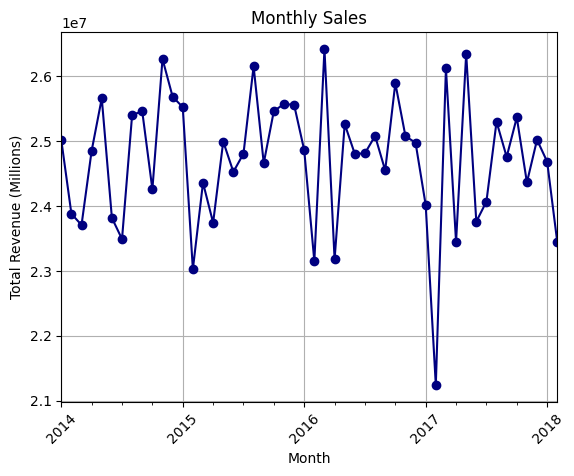

In [40]:
monthly_sales.plot(marker='o',color='navy')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [41]:
df_=df[df['order_date'].dt.year!=2018]


In [42]:
monthly_sales=df_.groupby(['order_month_num','order_month_name'])['revenue'].sum().sort_index()

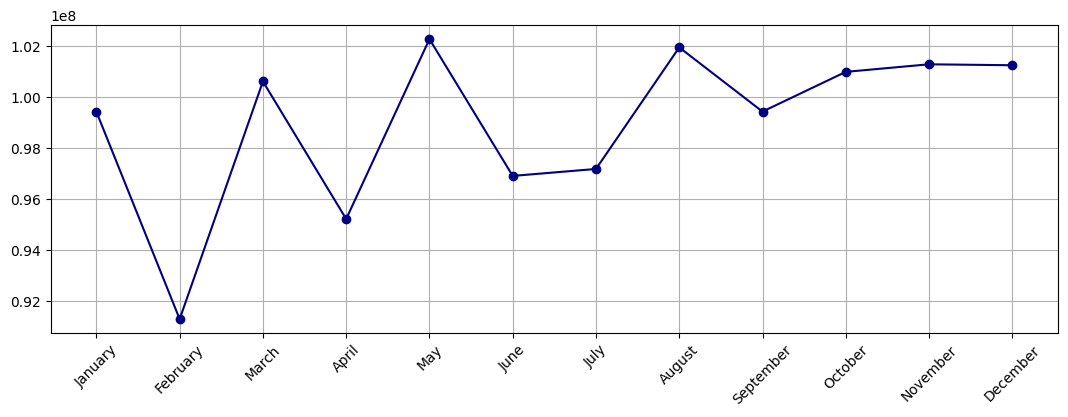

In [43]:
plt.figure(figsize=(13,4))

plt.plot(
    monthly_sales.index.get_level_values(1),
    monthly_sales.values,
    marker='o',
    color='navy'
)

plt.xticks(rotation=45)
plt.grid()
plt.show()

 **INSIGHTS**

Sales remain strong from August to January with a decile in February.

May remain a strong month in the middle of weak April,June and July.

# **PRODUCTS WITH HIGHEST REVENUE**

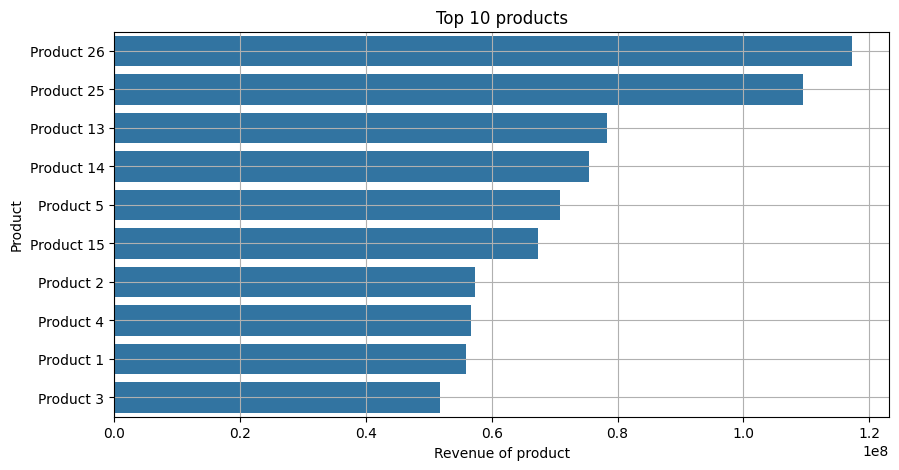

In [44]:
top_prod=df.groupby('product_name')['revenue'].sum()

top_prod=top_prod.nlargest(10)

plt.figure(figsize=(10,5))

sns.barplot(y=top_prod.index,x=top_prod.values)

plt.title('Top 10 products')
plt.xlabel('Revenue of product')
plt.ylabel('Product')
plt.grid()
plt.show()


In [45]:
df.sample(10)

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,order_month,order_month_name,order_month_num
48343,SO - 0006150,2017-02-19,Buzzbean Group,Wholesale,Product 2,8,1025.1,8200.8,840.582,CA,California,West,37.68187,-121.76801,3050087.565,6724.656,1476.144,2017-02,February,2
2415,SO - 0010117,2014-02-25,Voolia Ltd,Wholesale,Product 20,9,3892.7,35034.3,2997.379,TX,Texas,South,26.19063,-97.69610,NaN,26976.411,8057.889,2014-02,February,2
2300,SO - 0002716,2014-02-23,Geiss Company,Distributor,Product 4,5,1058.6,5293.0,793.950,CA,California,West,38.13020,-121.27245,NaN,3969.750,1323.250,2014-02,February,2
15152,SO - 0009785,2014-12-25,General Company,Wholesale,Product 18,11,2626.4,28890.4,2048.592,AL,Alabama,South,34.57332,-86.99214,NaN,22534.512,6355.888,2014-12,December,12
6305,SO - 0001718,2014-05-29,Aveda Group,Export,Product 4,10,2680.0,26800.0,2224.400,IL,Illinois,Midwest,39.84630,-88.95822,NaN,22244.000,4556.000,2014-05,May,5
8214,SO - 0001959,2014-07-14,Fred's Company,Export,Product 15,8,2512.5,20100.0,1306.500,IN,Indiana,Midwest,41.68338,-86.25001,NaN,10452.000,9648.000,2014-07,July,7
27883,SO - 0002780,2015-10-21,Omba Group,Distributor,Product 23,7,1909.5,13366.5,840.180,FL,Florida,South,28.55778,-81.45340,NaN,5881.260,7485.240,2015-10,October,10
2743,SO - 0010320,2014-03-05,Chatterbri Ltd,Distributor,Product 14,6,2251.2,13507.2,1508.304,NC,North Carolina,South,35.98998,-79.99047,NaN,9049.824,4457.376,2014-03,March,3
23174,SO - 0004724,2015-07-03,Arbor Company,Wholesale,Product 5,7,2572.8,18009.6,1132.032,CO,Colorado,West,40.01499,-105.27055,NaN,7924.224,10085.376,2015-07,July,7
19328,SO - 0002651,2015-04-02,Kare Corp,Distributor,Product 15,12,3832.4,45988.8,2835.976,MD,Maryland,South,39.29038,-76.61219,NaN,34031.712,11957.088,2015-04,April,4


# **PRODUCTS WITH HIGHEST PROFIT MARGIN**

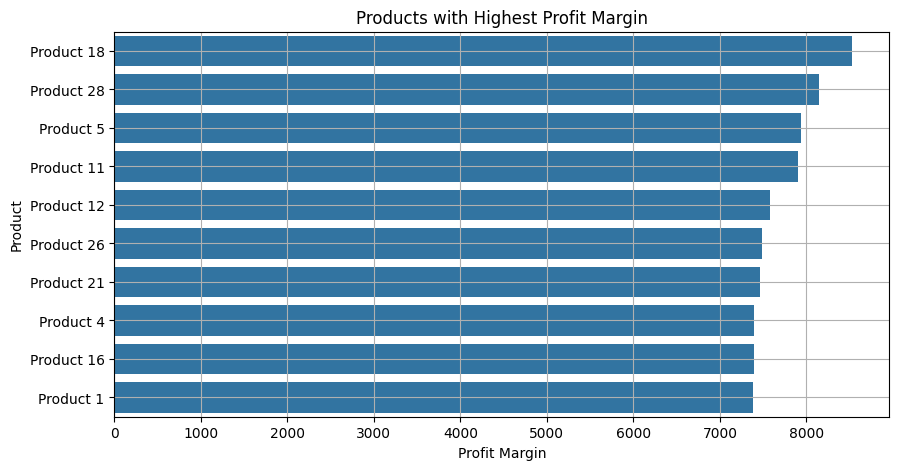

In [46]:
top_margin=df.groupby('product_name')['profit'].mean()
top_margin=top_margin.nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_margin.values,y=top_margin.index)
plt.xlabel('Profit Margin')
plt.ylabel('Product')
plt.title('Products with Highest Profit Margin')
plt.grid()
plt.show()

# **REVENUE SHARE OF CHANNELS**

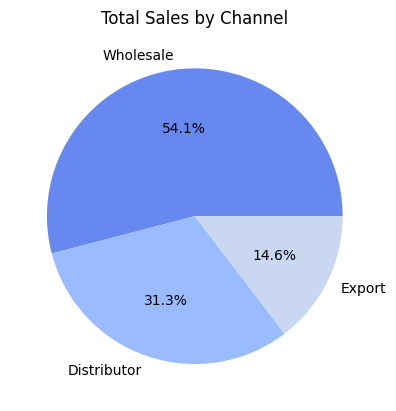

In [47]:
chan_sales=df.groupby('channel')['revenue'].sum()
chan_sales=chan_sales.nlargest(10)

plt.pie(chan_sales,labels=chan_sales.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('coolwarm'))
plt.title('Total Sales by Channel')
plt.show()

**INSIGHTS**

Wholesale is the major contributor in sales

# **NUMBER OF ORDERS BY ORDER VALUE**

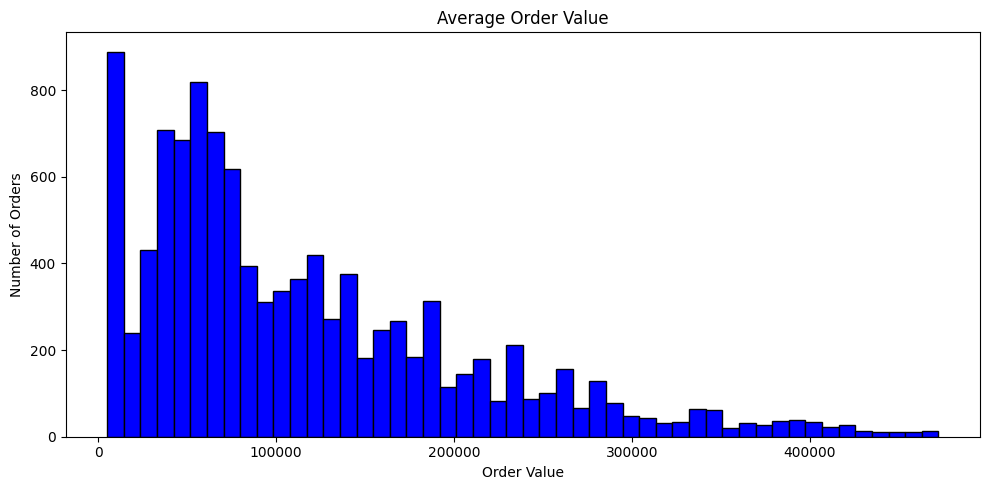

In [48]:


plt.figure(figsize=(10,5))

plt.hist(
    df.groupby('order_number')['revenue'].sum(),
    bins=50,
    color='blue',
    edgecolor='black'
)

plt.title('Average Order Value')
plt.xlabel('Order Value')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

**INSIGHTS**

Most orders are of less than $100,000

# **PROFIT MARGIN % W.R.T UNIT PRICE**

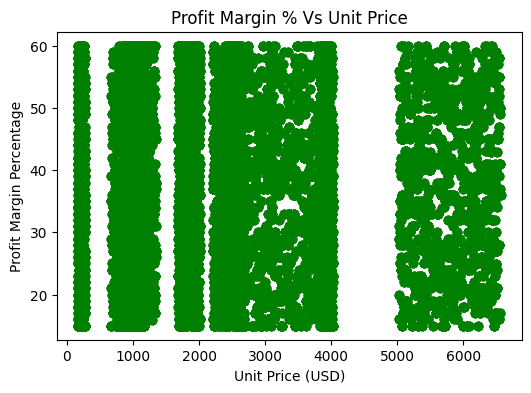

In [49]:
df['profit_margin_pct']=(df['profit']/df['revenue'])*100
plt.figure(figsize=(6,4))

plt.scatter(
    x=df['unit_price'],
    y=df['profit_margin_pct'],
    color='green',
    alpha=0.7  # transperency of overlapping points
)

plt.title('Profit Margin % Vs Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin Percentage')
plt.show()

**INSIGHTS**

No visible correlation in Profit Margin % and Unit Price of products.

# **UNIT PRICE DISTRIBUTION BY PRODUCT**

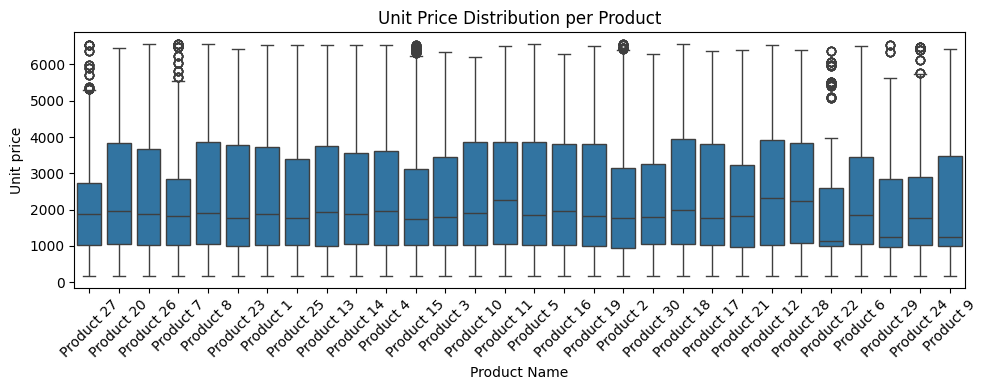

In [50]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,
            x=df['product_name'],
            y=df['unit_price'])

plt.title('Unit Price Distribution per Product')
plt.xlabel('Product Name')
plt.ylabel('Unit price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**INSIGHTS**

Product 27,7,15,2,22,29,24 contain outliers in their Unit Price.

# **SALES BY REGION**

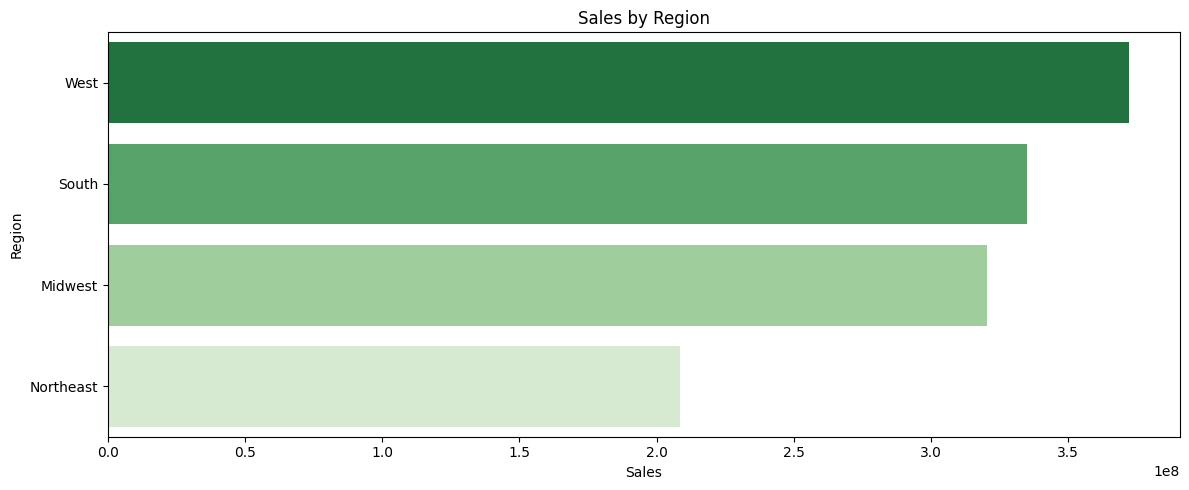

In [51]:
sbr=df.groupby('us_region')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(
    x=sbr.values,
    y=sbr.index,
    palette='Greens_r'
)

plt.title('Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

**INSIGHTS**

West contributes the most to sales while Northeast contributes the least.

# **SALES BY STATE**

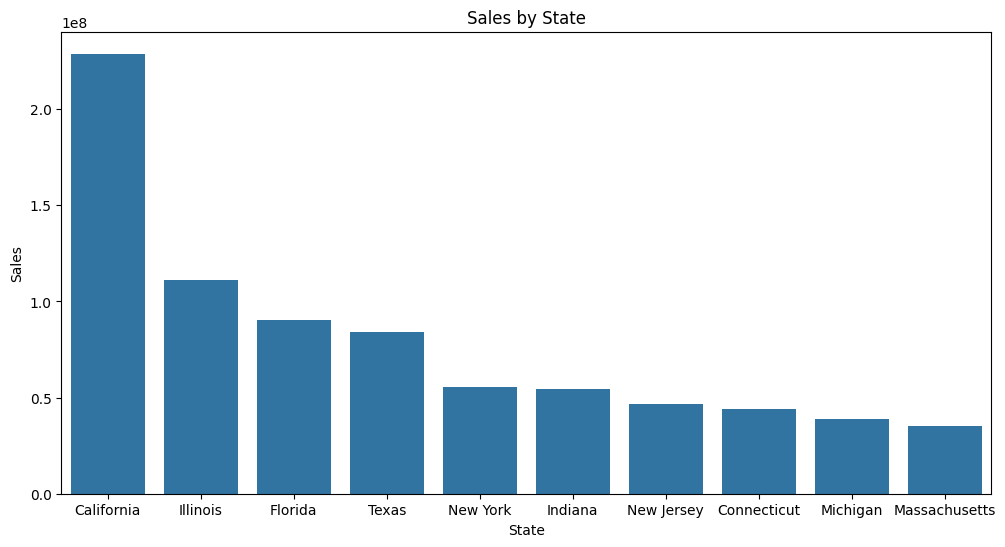

In [52]:
sbs=df.groupby('state_name')['revenue'].sum()
sbs=sbs.nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(
    x=sbs.index,
    y=sbs.values
)
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

**INSIGHTS**

California generates the most revenue by far. Texas, Florida and Illinois also mojor contributors.

# **PROFIT MARGIN % W.R.T. CHANNELS**

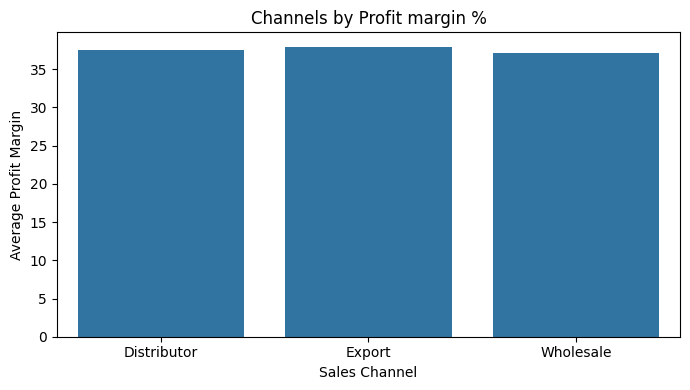

In [53]:
chan_margin=df.groupby('channel')['profit_margin_pct'].mean()
plt.figure(figsize=(7,4))
sns.barplot(
    x=chan_margin.index,
    y=chan_margin.values
)

plt.title('Channels by Profit margin %')
plt.xlabel('Sales Channel')
plt.ylabel('Average Profit Margin')
plt.tight_layout()
plt.show()

**INSIGHTS**

Profit Margins dont vary with Sales Channel.

# **10 LARGEST AND SMALLEST CUSTOMERS BY REVENUE**

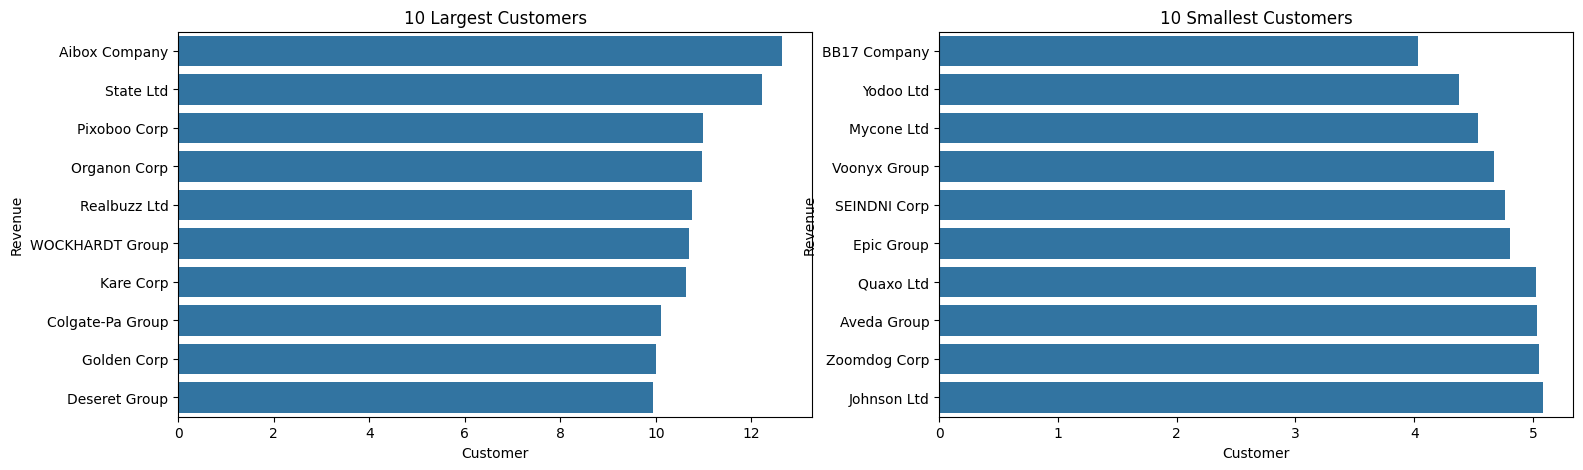

In [54]:
cust_by_rev=df.groupby('customer_name')['revenue'].sum()
fig,axes=plt.subplots(1,2,figsize=(18,5))
sns.barplot(
    y=cust_by_rev.nlargest(10).index,
    x=cust_by_rev.nlargest(10).values/1e6,
    ax=axes[0]
)
axes[0].set_title('10 Largest Customers')
axes[0].set_xlabel('Customer')
axes[0].set_ylabel('Revenue')


sns.barplot(
    y=cust_by_rev.nsmallest(10).index,
    x=cust_by_rev.nsmallest(10).values/1e6,
    ax=axes[1]
)
axes[1].set_title('10 Smallest Customers')
axes[1].set_xlabel('Customer')
axes[1].set_ylabel('Revenue')


plt.show()

# **CORRELATIONS**

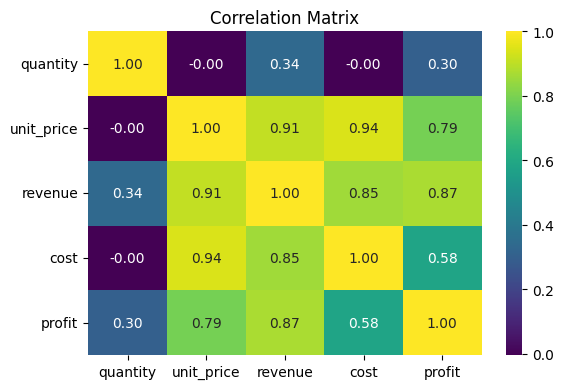

In [55]:
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']
corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis'
)

plt.title('Correlation Matrix')

plt.tight_layout()

plt.show()

In [56]:
df.to_csv('Sales_data(EDA Exported).csv',index=False)